In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
# df = pd.read_csv('NV_12062017_WBAN_53138_clean.csv')
df = pd.read_csv('996151_2_years.csv')
# df = pd.read_csv('996391_10_years.csv')
                                                                
df['DATE'] = df['DATE'].map(lambda x: datetime.strptime(str(x), '%Y/%m/%d %H:%M'))
# df['HOURLYDRYBULBTEMPF'] = df['HOURLYDRYBULBTEMPF'].astype(float)
df['PUREDATE'] = df['DATE'].map(lambda x : x.date())
df['MONTH'] = df['DATE'].map(lambda x : x.month)
df['YEAR'] = df['DATE'].map(lambda x : x.year)

# Calculate Season
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasonDates = [('Winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('Spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('Summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('Autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('Winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasonDates
                if start <= now <= end)

df['SEASON'] = df['DATE'].map(lambda x : get_season(x))

sodDf = df[df['REPORTTPYE'] == 'SOD']

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# data clean

df[['HOURLYDRYBULBTEMPF', 'HOURLYDRYBULBTEMPC']] = df[['HOURLYDRYBULBTEMPF', 'HOURLYDRYBULBTEMPC']].astype(str)
     
df['HOURLYDRYBULBTEMPF'] = [a.split("s")[0] for a in df['HOURLYDRYBULBTEMPF']]
df['HOURLYDRYBULBTEMPC'] = [a.split("s")[0] for a in df['HOURLYDRYBULBTEMPC']]
 
df[['HOURLYDRYBULBTEMPF', 'HOURLYDRYBULBTEMPC']] = df[['HOURLYDRYBULBTEMPF', 'HOURLYDRYBULBTEMPC']].astype(float)

# Temperature By Year

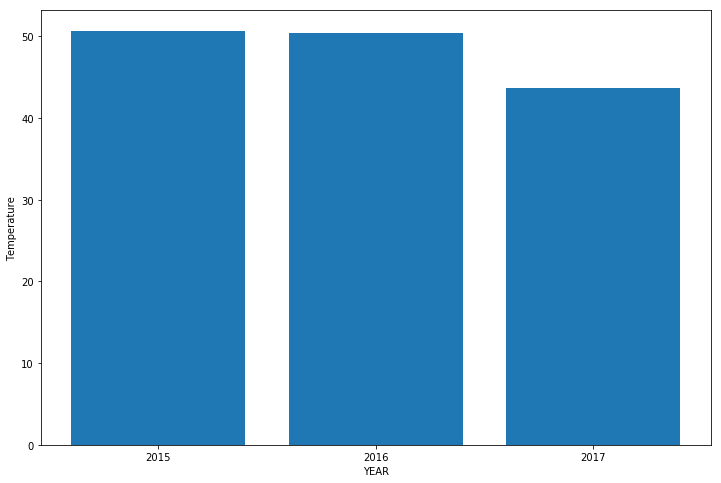

In [4]:
groupByUnit = 'YEAR'

TempByDateDf = pd.DataFrame(df.groupby(groupByUnit)['HOURLYDRYBULBTEMPF'].mean()).reset_index()

ind = np.arange(len(TempByDateDf[groupByUnit]))

plt.bar(ind, TempByDateDf['HOURLYDRYBULBTEMPF'])
plt.xticks(ind, TempByDateDf[groupByUnit])
plt.xlabel(groupByUnit)
plt.ylabel('Temperature')

# Temperature By Season

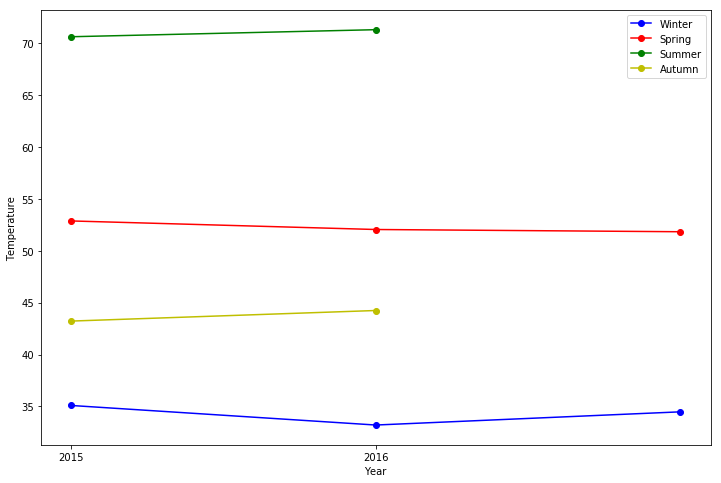

In [6]:
TempBySeasonDf = pd.DataFrame(df.groupby(['YEAR', 'SEASON'])['HOURLYDRYBULBTEMPF'].mean()).reset_index()

colors = ['b', 'r', 'g', 'y']

for i in range(len(seasons)):
    x = TempBySeasonDf[TempBySeasonDf['SEASON'] == seasons[i]]['YEAR']
    y = TempBySeasonDf[TempBySeasonDf['SEASON'] == seasons[i]]['HOURLYDRYBULBTEMPF']
    plt.plot(x, y, marker='o', color=colors[i], linestyle='-', label=seasons[i])

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.xticks(x)
plt.legend()

# Temperature By Day

In [ ]:
TempByDateDf = pd.DataFrame(df.groupby('PUREDATE')['HOURLYDRYBULBTEMPF'].mean()).reset_index()

x = TempByDateDf['PUREDATE']
y = TempByDateDf['HOURLYDRYBULBTEMPF']

plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Temperature')

### Smooth
# x_sm = np.array(x)
# y_sm = np.array(y)

# x_smooth = np.linspace(x_sm.min(), x_sm.max())
# y_smooth = spline(x, y, x_smooth)

# plt.plot(x_smooth, y_smooth)

# Temperature Difference By Year

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


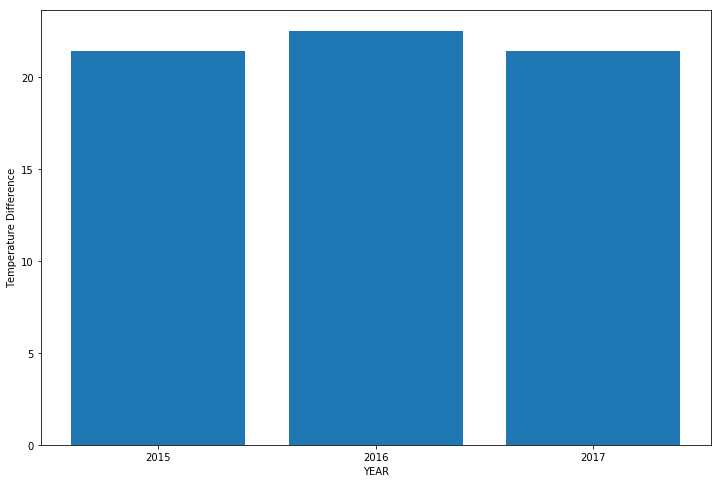

In [8]:
sodDf['dailyTempDiff'] = sodDf['DAILYMaximumDryBulbTemp'] - sodDf['DAILYMinimumDryBulbTemp']

groupByUnit = 'YEAR'

TempDiffByYearDf = pd.DataFrame(sodDf.groupby(groupByUnit)['dailyTempDiff'].mean()).reset_index()

ind = np.arange(len(TempDiffByYearDf[groupByUnit]))

plt.bar(ind, TempDiffByYearDf['dailyTempDiff'])
plt.xticks(ind, TempDiffByYearDf[groupByUnit])
plt.xlabel(groupByUnit)
plt.ylabel('Temperature Difference')

# Temperature Difference By Season

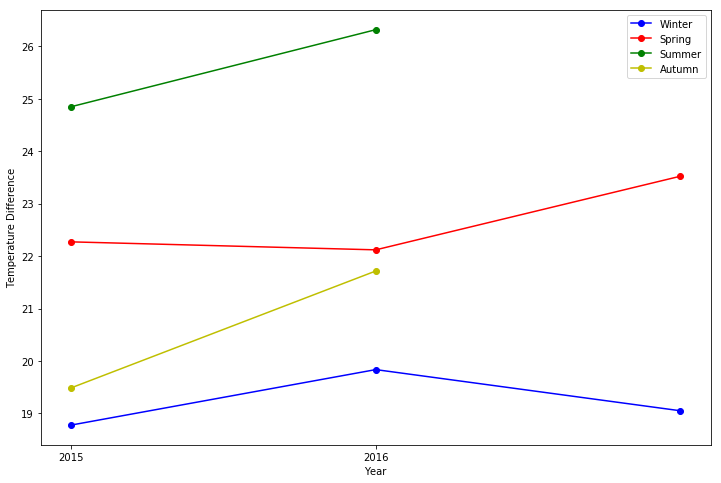

In [9]:
TempDiffBySeasonDf = pd.DataFrame(sodDf.groupby(['YEAR', 'SEASON'])['dailyTempDiff'].mean()).reset_index()

colors = ['b', 'r', 'g', 'y']

for i in range(len(seasons)):
    x = TempDiffBySeasonDf[TempDiffBySeasonDf['SEASON'] == seasons[i]]['YEAR']
    y = TempDiffBySeasonDf[TempDiffBySeasonDf['SEASON'] == seasons[i]]['dailyTempDiff']
    plt.plot(x, y, marker='o', color=colors[i], linestyle='-', label=seasons[i])

plt.xlabel('Year')
plt.ylabel('Temperature Difference')
plt.xticks(x)
plt.legend()

# Temperature Difference By Day


In [ ]:
sodDf['dailyTempDiff'] = sodDf['DAILYMaximumDryBulbTemp'] - sodDf['DAILYMinimumDryBulbTemp']

x = sodDf['PUREDATE']
y = sodDf['dailyTempDiff']

plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Temperature Difference')

# Temperature Departure By Month

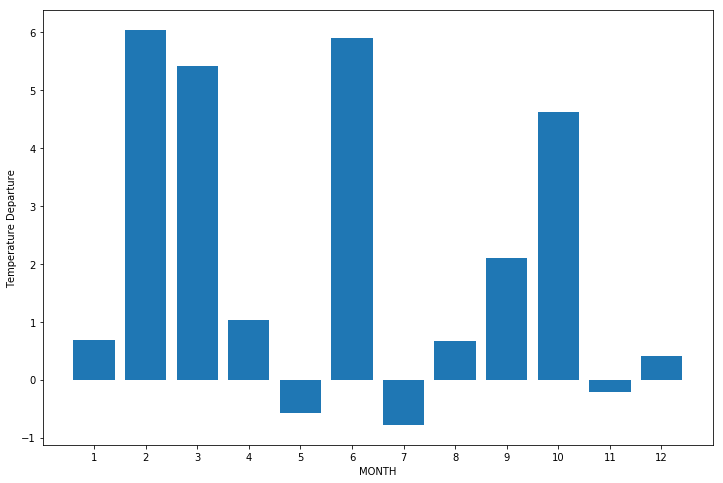

In [33]:
groupByUnit = 'MONTH'

tempDeptDf = pd.DataFrame(sodDf.groupby(groupByUnit)['DAILYDeptFromNormalAverageTemp'].mean()).reset_index()

ind = np.arange(len(tempDeptDf[groupByUnit]))

plt.bar(ind, tempDeptDf['DAILYDeptFromNormalAverageTemp'])
plt.xticks(ind, tempDeptDf[groupByUnit])
plt.xlabel(groupByUnit)
plt.ylabel('Temperature Departure')

# Temperature Departure By Day

In [ ]:
x = sodDf['PUREDATE']
y = sodDf['DAILYDeptFromNormalAverageTemp']

plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Temperature Departure')

# Daily Sunrise Line Chart


In [ ]:
df['DAILYSunrise'] = df['DAILYSunrise'].map(lambda x: datetime.strptime(str(x), '%H%M'))

# for year in range(min(df['YEAR']), max(df['YEAR'])):
#     x = TempDiffBySeasonDf[TempDiffBySeasonDf['SEASON'] == seasons[i]]['YEAR']
#     y = TempDiffBySeasonDf[TempDiffBySeasonDf['SEASON'] == seasons[i]]['dailyTempDiff']
#     plt.plot(x, y, colors[i] + '-', label=seasons[i])

# x = df['DATE']
# y = df[df['YEAR']]['DAILYSunrise']

# plt.plot(x,y)
# plt.xlabel('Date')
# plt.ylabel('Daily Sunrise')

# Daily Sunset Line Chart


In [ ]:
# df['DAILYSunrise'] = df['DAILYSunrise'].map(lambda x: datetime.strptime(str(x), '%H%M'))
# df['DAILYSunset'] = df['DAILYSunset'].map(lambda x: datetime.strptime(str(x), '%H%M'))

df['MONTHDAY'] = df['PUREDATE'].map(lambda x : x.replace(year = 1996))

x = df['MONTHDAY']
y = df['DAILYSunset']

plt.plot(x,y)

y = df['DAILYSunrise']
plt.plot(x, y)

plt.xlabel('Date')
plt.ylabel('Daily Sunset')

# Sunrise and Sunset time Relationship

In [ ]:
x = df['DAILYSunrise']
y = df['DAILYSunset']

plt.plot(x,y)
plt.xlabel('Daily Sunrise')
plt.ylabel('Daily Sunset')

# Wind Speed By Hour Box Plot


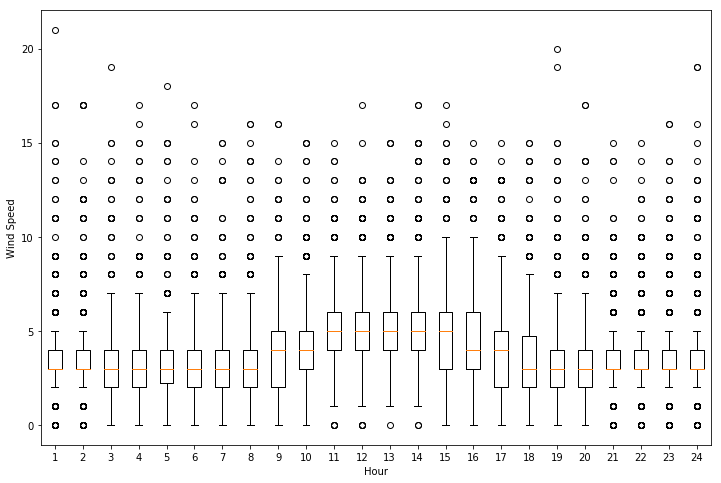

In [24]:
windSpeedDf = df[df['HOURLYWindSpeed'] == df['HOURLYWindSpeed']][['HOURLYWindSpeed', 'DATE', 'YEAR', 'SEASON']]

windSpeedDf['HOUR'] = windSpeedDf['DATE'].map(lambda x : x.hour)

windSpeed_dict = {}
for index, row in windSpeedDf.iterrows():
    if row['HOUR'] in windSpeed_dict:
        windSpeed_dict[row['HOUR']].append(row['HOURLYWindSpeed'])
    else:
        windSpeed_dict[row['HOUR']] = []

plt.boxplot(list(windSpeed_dict.values()))
plt.xlabel('Hour')
plt.ylabel('Wind Speed')

# Wind Speed By Season

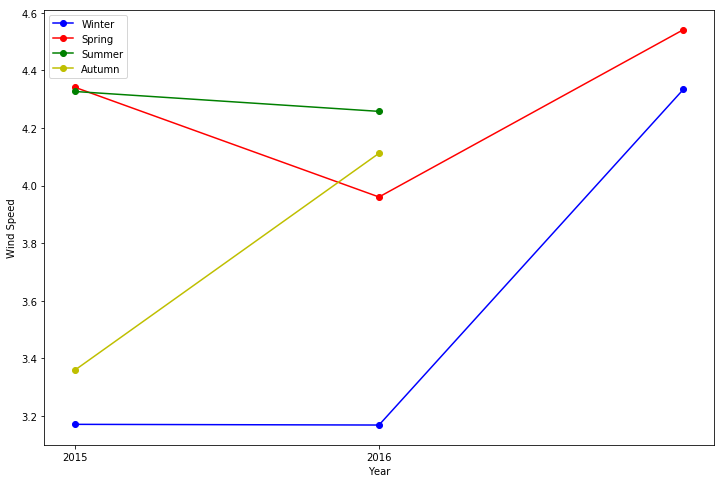

In [15]:
windSpeedBySeasonDf = pd.DataFrame(df.groupby(['YEAR', 'SEASON'])['HOURLYWindSpeed'].mean()).reset_index()

colors = ['b', 'r', 'g', 'y']

for i in range(len(seasons)):
    x = windSpeedBySeasonDf[windSpeedBySeasonDf['SEASON'] == seasons[i]]['YEAR']
    y = windSpeedBySeasonDf[windSpeedBySeasonDf['SEASON'] == seasons[i]]['HOURLYWindSpeed']
    plt.plot(x, y, marker='o', color=colors[i], linestyle='-', label=seasons[i])

plt.xlabel('Year')
plt.ylabel('Wind Speed')
plt.xticks(x)
plt.legend()

# Precipitation By Year

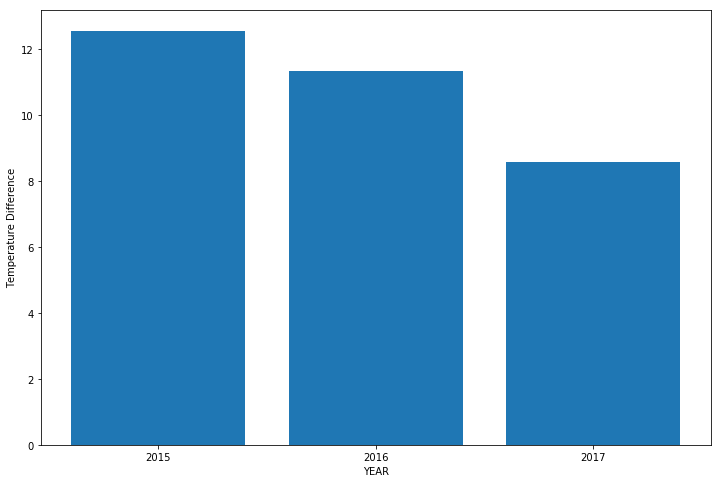

In [25]:
groupByUnit = 'YEAR'

TempDiffByYearDf = pd.DataFrame(df.groupby(groupByUnit)['HOURLYPrecip'].sum()).reset_index()

ind = np.arange(len(TempDiffByYearDf[groupByUnit]))

plt.bar(ind, TempDiffByYearDf['HOURLYPrecip'])
plt.xticks(ind, TempDiffByYearDf[groupByUnit])
plt.xlabel(groupByUnit)
plt.ylabel('Precipitation')

# Precipitation By Month


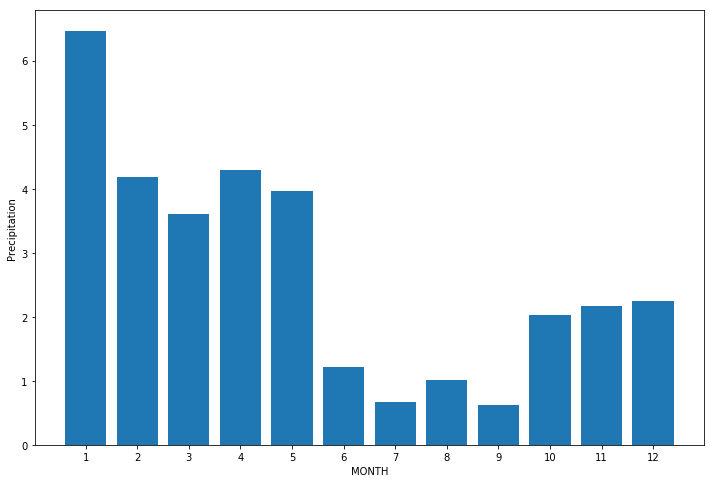

In [29]:
precipDf = df[df['HOURLYPrecip'] == df['HOURLYPrecip']]

groupByUnit = 'MONTH'

newPrecipDf = pd.DataFrame(precipDf.groupby(groupByUnit)['HOURLYPrecip'].sum()).reset_index()

ind = np.arange(len(newPrecipDf[groupByUnit]))

plt.bar(ind, newPrecipDf['HOURLYPrecip'])
plt.xticks(ind, newPrecipDf[groupByUnit])
plt.xlabel(groupByUnit)
plt.ylabel('Precipitation')

# Precipitation By Season

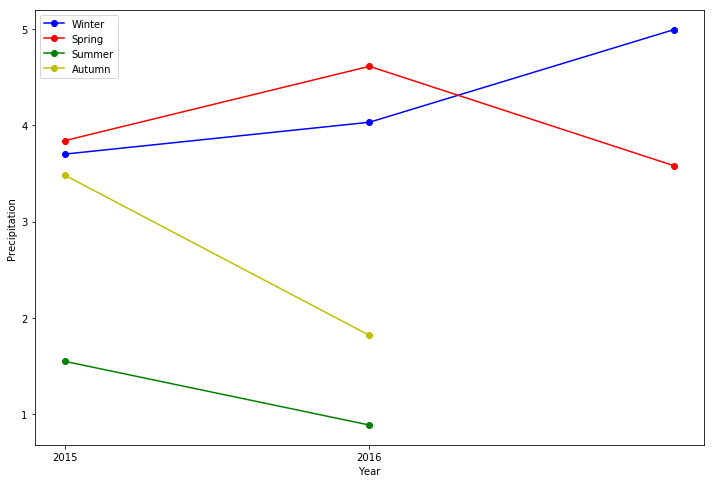

In [20]:
precipBySeasonDf = pd.DataFrame(df.groupby(['YEAR', 'SEASON'])['HOURLYPrecip'].sum()).reset_index()

colors = ['b', 'r', 'g', 'y']

for i in range(len(seasons)):
    x = precipBySeasonDf[precipBySeasonDf['SEASON'] == seasons[i]]['YEAR']
    y = precipBySeasonDf[precipBySeasonDf['SEASON'] == seasons[i]]['HOURLYPrecip']
    plt.plot(x, y, marker='o', color=colors[i], linestyle='-', label=seasons[i])

plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.xticks(x)
plt.legend()